# 2023-10-25 Background Subtraction with Annulus, and Picking Comparison Stars

## Overview

+ Explain what the "annulus" is in aperture photometry
+ Look at an example of an aperture with an annulus
+ Choose comparison stars for your object

In [13]:
from astropy.modeling.models import Gaussian2D
from astropy.stats import gaussian_sigma_to_fwhm

from matplotlib import pyplot as plt

import numpy as np

from photutils.profiles import RadialProfile, CurveOfGrowth
from photutils.aperture import CircularAperture, CircularAnnulus

In [2]:
def image_with_pixels_labeled(image, pix_precision=0, center_dots=True, ax=None, fig=None, **text_kwargs):
    image_size = image.shape[0]
    if ax is None:
        ax = plt.gca()
    if fig is not None:
        fig = plt.gcf()
    ima = ax.imshow(image)
    if fig is not None:
        fig.colorbar(ima, ax=ax)
    number_format = '{:.' + f'{pix_precision:d}' + 'f}'
    for i in range(image_size):
        for j in range(image_size):
            ax.text(i, j, number_format.format(image[j, i]), 
                     fontweight='bold',
                     horizontalalignment='center',
                     verticalalignment='center',
                     **text_kwargs
                    )
            if center_dots:
                ax.scatter(i, j, marker='.', c='red', alpha=0.5)


In [4]:
def circle(x, y, radius):
    angle = np.linspace(0, 2 * np.pi)
    return x + radius * np.cos(angle), y + radius * np.sin(angle)

In [3]:
rng = np.random.default_rng()

In [4]:
figure_size = (20, 20)
graph_size = (10, 10)
image_size = 25
star_center = (12, 12)
background_center = 200
sigma = 2  # Gaussian width of the star
background_image = rng.poisson(lam=background_center, size=[image_size, image_size])

In [6]:

fwhm = sigma * gaussian_sigma_to_fwhm

star = Gaussian2D(amplitude=200, x_stddev=sigma, y_stddev=sigma)
grids = np.mgrid[0:image_size, 0:image_size]
star_grid = star(grids[0] - star_center[0], grids[1] - star_center[1])

In [7]:
total_image = background_image + star_grid

In [8]:
new_background_image = rng.poisson(lam=200, size=[image_size, image_size])
new_total_image = new_background_image + star_grid

In [19]:
ap_rad = np.round(fwhm)
gap = 2
annul_width = 3
aperture = CircularAperture(star_center, ap_rad)
annul = CircularAnnulus(star_center, ap_rad + gap, ap_rad + gap + annul_width)

### Aperture with an annulus

The pixels in the donut-shaped annulus are used to estimate the background.

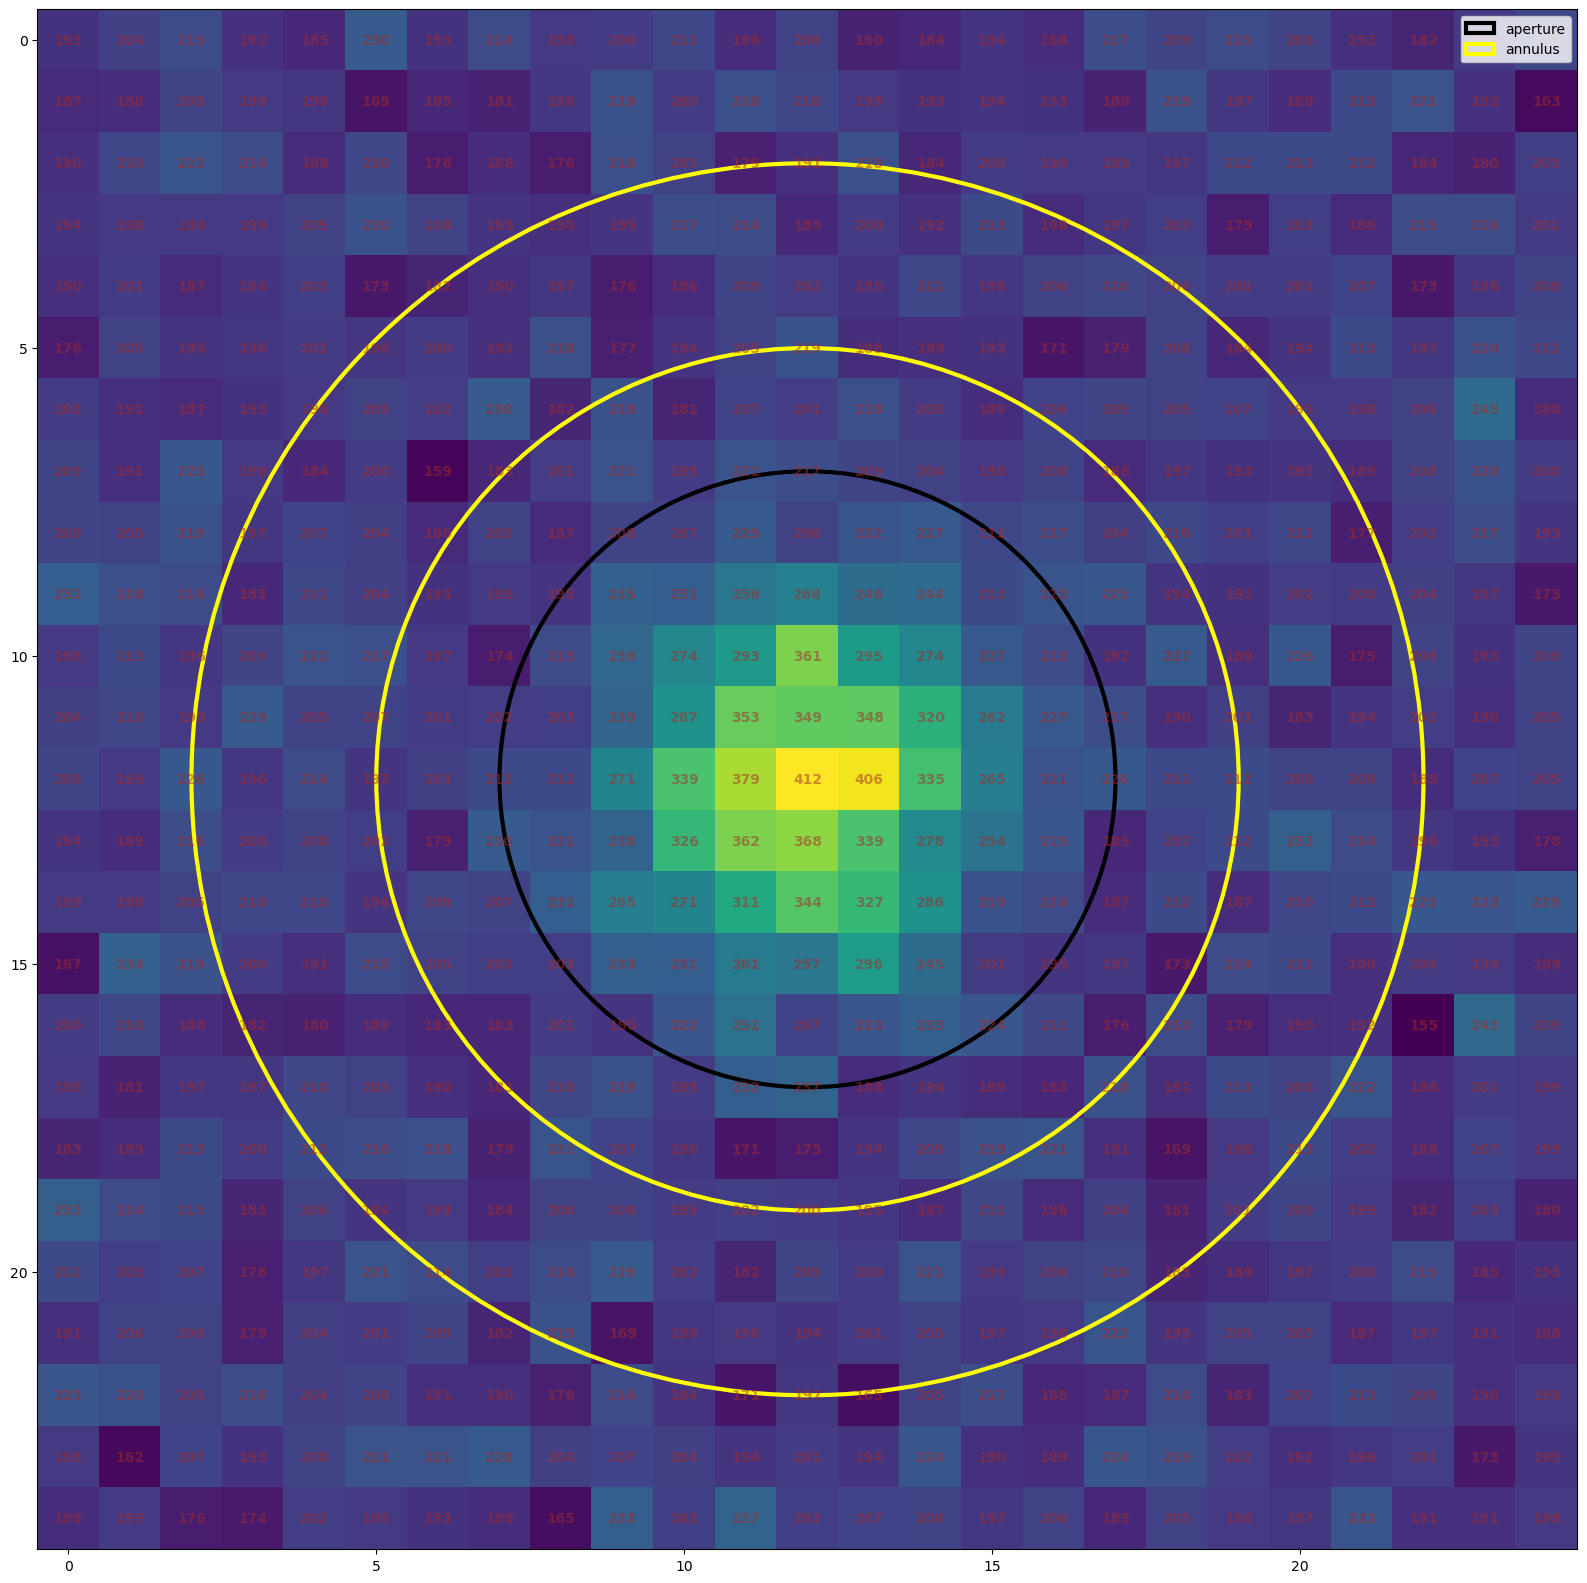

In [20]:
fig = plt.figure(figsize=figure_size)


image_with_pixels_labeled(new_total_image, color='brown', center_dots=False, alpha=0.5)
aperture.plot(linewidth=3, label='aperture')
annul.plot(linewidth=3, color='yellow', label='annulus')
plt.legend(loc='upper right')

## Picking comparison stars

+ Go to the combined image folder for your object
+ Use the launch to make a notebook "02 Comparison Stars" in the folder and open it